<a href="https://colab.research.google.com/github/JenioDwiSetyoFavianGian/MACHINE-LEARNING-2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NAMA : Jenio Dwi Setyo Favian Gian
##NIM  : 2141720212
##NO   : 14

#Ketentuan UTS
Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.

2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.

3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.

4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,

*   Merubah color space
*   Reduksi dimensi
*   dsb

5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi
Open Challange (Opsional)

Bagaimana cara melakukan evaluasi pada hasil segementasi?
Terapkan pada kasus ini!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

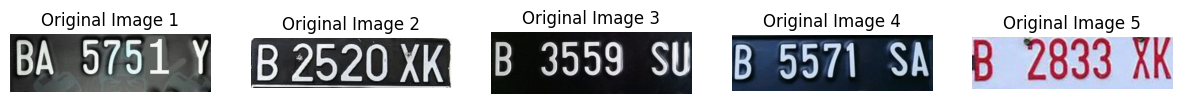

In [9]:
import cv2
import matplotlib.pyplot as plt

# Daftar nama file gambar
image_files = ['/content/drive/MyDrive/MACHINE-LEARNING/dummy/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B3559SU_png.rf.da969620aaf4665b616f8f677a9a6201.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B5571SA_PNG.rf.1886d7f87e9c5f4e9eb170e1c04656c6.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B2833XK_png.rf.31ea229a61bc8ed55b3115a82ae912e7.jpg']
img = [cv2.imread(image_file) for image_file in image_files]

def show_images(img, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(img)):
        plt.subplot(1, len(img), i+1)
        # Convert image color space from BGR to RGB
        img_rgb = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# List of titles for each image
titles = ['Original Image 1', 'Original Image 2', 'Original Image 3', 'Original Image 4', 'Original Image 5']

# Display the images
show_images(img, titles)

In [5]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    # Ukuran Gambar
    h, w, ch= img.shape
    print("Height  :", h)
    print("Width   :", w)
    print("Channels:", ch)

Height  : 343
Width   : 1183
Channels: 3
Height  : 343
Width   : 1183
Channels: 3
Height  : 343
Width   : 1183
Channels: 3
Height  : 343
Width   : 1183
Channels: 3
Height  : 343
Width   : 1183
Channels: 3


In [6]:
for image_file in image_files:
    # Load gambar
    img = cv2.imread(image_file)

    data = img / 255.0
    data = data.reshape(h * w, ch)
    print("Data Shape", data.shape)

Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)
Data Shape (405769, 3)


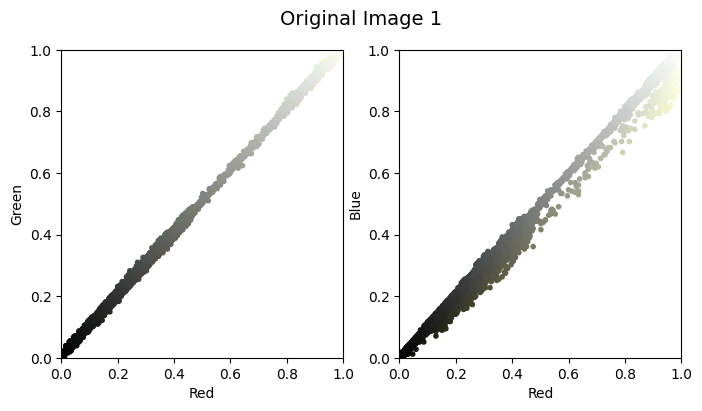

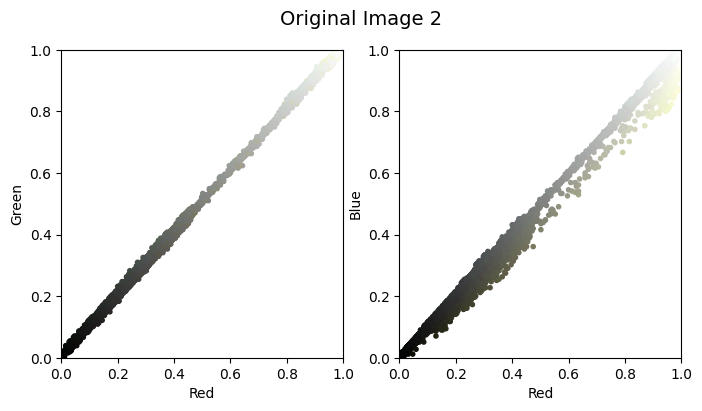

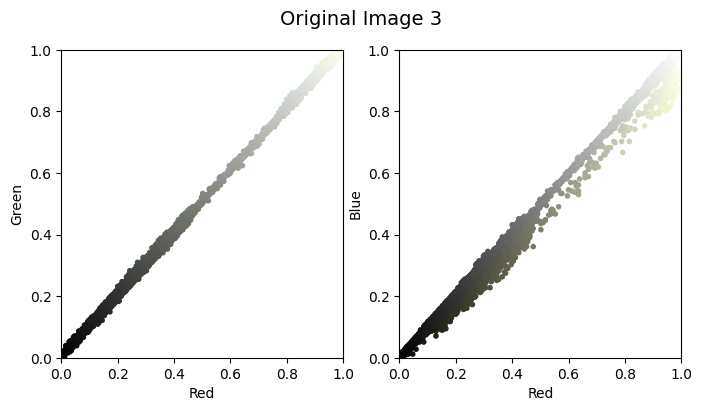

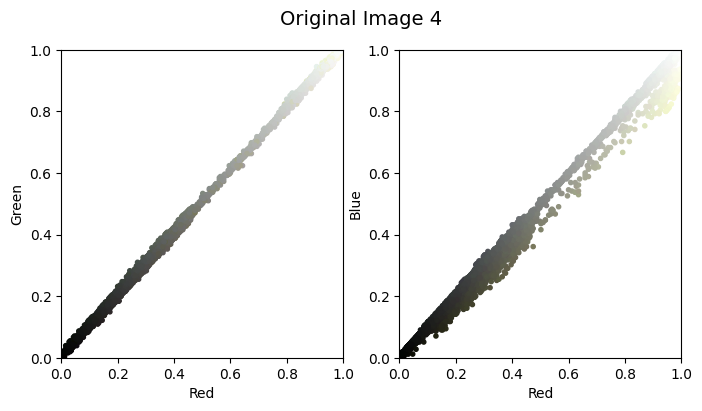

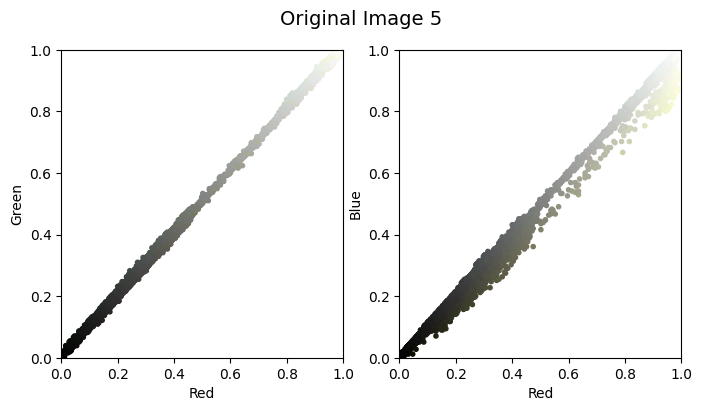

In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

for i in range(5):
  plot_pixels(data, titles[i])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


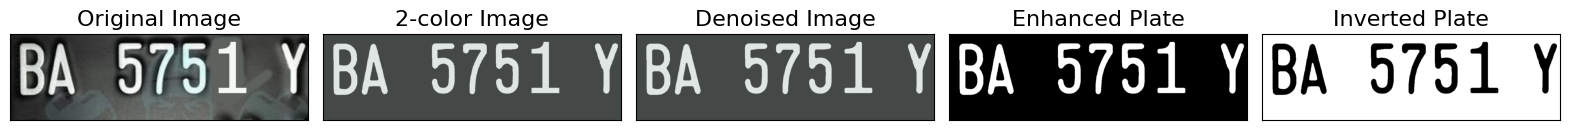

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


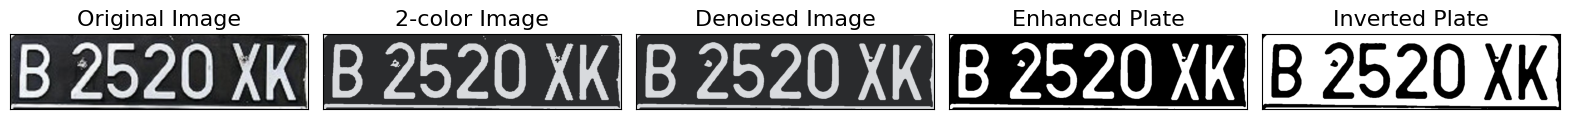

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


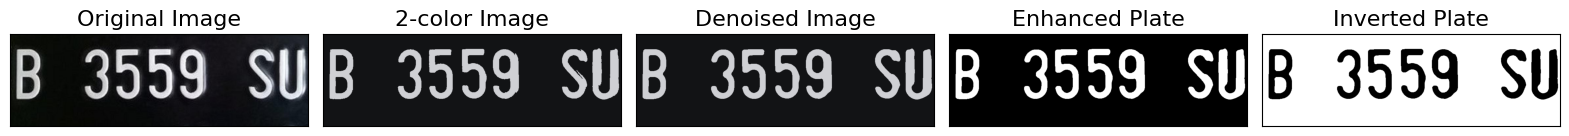

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


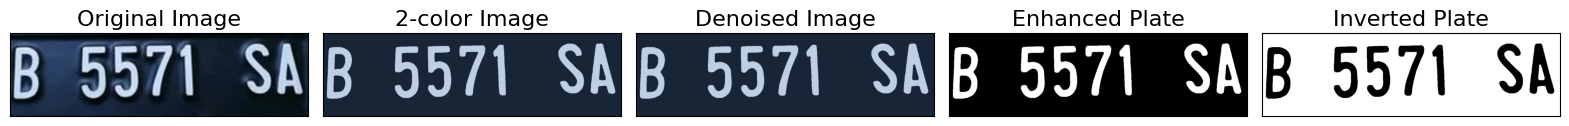

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


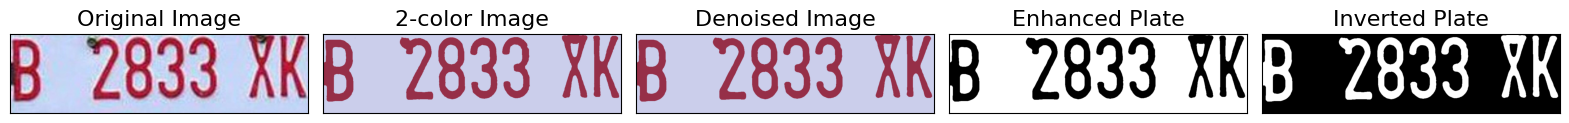

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Fungsi untuk mengubah warna terdiri dari 2 warna
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

# Fungsi untuk meningkatkan kejelasan plat nomor
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    return thresh

# Fungsi untuk menghilangkan noise
def remove_noise(image):
    return cv2.medianBlur(image, 9)

# Fungsi untuk melakukan inversi warna
def invert_colors(image):
    return cv2.bitwise_not(image)

# Path ke folder yang berisi gambar
image_files = ['/content/drive/MyDrive/MACHINE-LEARNING/dummy/BA5751Y_png.rf.f8c4c1738e1d2b5ed1c63f713adebedd.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B3559SU_png.rf.da969620aaf4665b616f8f677a9a6201.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B5571SA_PNG.rf.1886d7f87e9c5f4e9eb170e1c04656c6.jpg',
               '/content/drive/MyDrive/MACHINE-LEARNING/dummy/B2833XK_png.rf.31ea229a61bc8ed55b3115a82ae912e7.jpg']

# Mengubah warna, menghilangkan noise, dan meningkatkan kejelasan nomor plat
for image_file in image_files:
    img = cv2.imread(image_file)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, hasil enhanced, dan hasil inverted pada gambar
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)

    plt.show()
